In [2]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
class MLP(nn.Module):
  def __init__(self, infts, outfts):
    super(MLP, self).__init__()
    self.hiddenlayer1 = nn.Linear(infts, 50)
    self.hiddenlayer2 = nn.Linear(50,100)
    self.outlayer = nn.Linear(100,outfts)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid() 

  def forward(self, df):
    x = self.relu(self.hiddenlayer1(df))
    x = self.relu(self.hiddenlayer2(x))
    x = self.outlayer(x)
    x = self.sigmoid(x)

    return x

In [4]:
df_test = pd.read_csv("/content/drive/MyDrive/yapay-sinir-aglari/cure_the_princess_test.csv")
df_train = pd.read_csv("/content/drive/MyDrive/yapay-sinir-aglari/cure_the_princess_train.csv")
df_validation = pd.read_csv("/content/drive/MyDrive/yapay-sinir-aglari/cure_the_princess_validation.csv")

In [5]:
y_train = df_train.iloc[:, -1:].values
x_train = df_train.iloc[:, :-1].values
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

In [6]:
y_test = df_test.iloc[:, -1:].values
x_test = df_test.iloc[:, :-1].values
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [7]:
y_val = df_validation.iloc[:, -1:].values
x_val = df_validation.iloc[:, :-1].values
x_val = torch.tensor(x_test, dtype=torch.float32)
y_val = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-7-4b1056553800>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_val = torch.tensor(x_test, dtype=torch.float32)
<ipython-input-7-4b1056553800>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_val = torch.tensor(y_test, dtype=torch.float32)


In [8]:
train_data = TensorDataset(x_train, y_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 16, shuffle=True)

In [9]:
val_data = TensorDataset(x_val, y_val)
val_loader = torch.utils.data.DataLoader(val_data, batch_size = 16, shuffle=True)

In [10]:
test_data = TensorDataset(x_test, y_test)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 16, shuffle=True)

In [11]:
torch.manual_seed(190401066)
model = MLP(13, 1)
# Kayıp fonksiyonu ve optimizasyon fonksiyonu tanımlama
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Modeli eğitme
num_epochs = 25
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        
        # Gradyanları sıfırlama
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(inputs)
        # Loss hesaplama
        loss = criterion(outputs, labels)

        # Backward propagation
        loss.backward()

        # Parametrelerin güncellenmesi
        optimizer.step()
        # Her 100 adımda bir kayıp yazdırma
        if (i+1) % 70 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(x_train)//16, loss.item()))
with torch.no_grad():
    outputs = model(x_test)
    predicted = torch.round(outputs)
    accuracy = (predicted == y_test.view(-1, 1)).sum().item() / len(y_test)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))

Epoch [1/25], Step [70/78], Loss: 0.6162
Epoch [2/25], Step [70/78], Loss: 0.6282
Epoch [3/25], Step [70/78], Loss: 0.4767
Epoch [4/25], Step [70/78], Loss: 0.3171
Epoch [5/25], Step [70/78], Loss: 0.4054
Epoch [6/25], Step [70/78], Loss: 0.3960
Epoch [7/25], Step [70/78], Loss: 0.4244
Epoch [8/25], Step [70/78], Loss: 0.3823
Epoch [9/25], Step [70/78], Loss: 0.4187
Epoch [10/25], Step [70/78], Loss: 0.3360
Epoch [11/25], Step [70/78], Loss: 0.4559
Epoch [12/25], Step [70/78], Loss: 0.3768
Epoch [13/25], Step [70/78], Loss: 0.2499
Epoch [14/25], Step [70/78], Loss: 0.3354
Epoch [15/25], Step [70/78], Loss: 0.2488
Epoch [16/25], Step [70/78], Loss: 0.2368
Epoch [17/25], Step [70/78], Loss: 0.1866
Epoch [18/25], Step [70/78], Loss: 0.4071
Epoch [19/25], Step [70/78], Loss: 0.2539
Epoch [20/25], Step [70/78], Loss: 0.3031
Epoch [21/25], Step [70/78], Loss: 0.3215
Epoch [22/25], Step [70/78], Loss: 0.2934
Epoch [23/25], Step [70/78], Loss: 0.5010
Epoch [24/25], Step [70/78], Loss: 0.1458
E

Epoch 0 Training loss 0.5803182692844656 Validation Loss : 0.4215915741360917
Epoch 1 Training loss 0.35726776879422273 Validation Loss : 0.4046972108130552
Epoch 2 Training loss 0.2926047251005716 Validation Loss : 0.2978262238356532
Epoch 3 Training loss 0.27818276789746704 Validation Loss : 0.23863968313956746
Epoch 4 Training loss 0.23850696599936183 Validation Loss : 0.5997791083491578
Earlystopping Patience Counter: 1
Epoch 5 Training loss 0.22360375462264953 Validation Loss : 0.2863079612048305
Earlystopping Patience Counter: 2
Epoch 6 Training loss 0.2111899770230432 Validation Loss : 0.2612270689284315
Earlystopping Patience Counter: 3
Epoch 7 Training loss 0.18481835373972036 Validation Loss : 0.19561340355751466
Epoch 8 Training loss 0.17553172003524967 Validation Loss : 0.20690190332124428
Earlystopping Patience Counter: 1
Epoch 9 Training loss 0.16335681492250553 Validation Loss : 0.1634127575219894
Epoch 10 Training loss 0.15835786405715008 Validation Loss : 0.16166788379

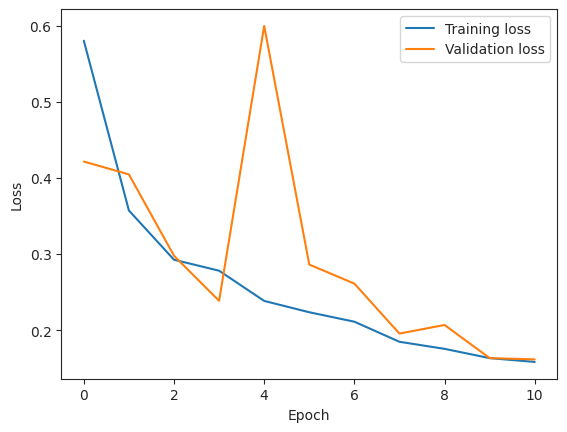

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
torch.manual_seed(190401066)

learning_rate = 0.01
num_epochs = 11
patience = 5


model = MLP(13,1)

# Loss fonksiyonu ve optimizasyon algoritmasinin belirlenmesi.
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

list_train_loss, list_val_loss = [], []

best_val_loss = None

patience_counter = 0
# Model egitimi burada basliyor
for epoch in range(num_epochs):

    # egitim dongusu
    train_loss = 0.0
    train_count = 0.0
    for inputs, labels in train_loader:


        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_count += 1.0
        train_loss += loss.item()
        

    val_loss = 0.0

    with torch.no_grad():
        model.eval()
        for inputs, labels in val_loader:

            outputs = model(inputs)

            loss = criterion(outputs, labels)
            val_loss += loss.item()


    model.train()

    # Losslari hesaplama
    train_loss /= train_count
    val_loss /= len(val_loader)

    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",val_loss)

    list_train_loss.append(train_loss)
    list_val_loss.append(val_loss)

    val_score = val_loss
    if best_val_loss is None:
        best_val_loss = val_score # hafızada patience boyu tutmaya başla
        torch.save(model.state_dict(), "checkpoint.pt")
    elif best_val_loss < val_score: # patience sayisi
        patience_counter += 1
        print("Earlystopping Patience Counter:",patience_counter)
        if patience_counter == patience:
            break
    else:
        best_val_loss = val_score
        torch.save(model.state_dict(), "checkpoint.pt") # en iyi modeli tutuyoruz
        patience_counter = 0
    

# Gorsellestirme
sns.set_style("ticks")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [13]:
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

model = MLP(13,1)
model.load_state_dict(torch.load('checkpoint.pt'))
model.eval()

predicts =[]
true_labels = list()
with torch.no_grad():
    for inputs,label in test_loader:
        outputs = model(inputs)
        for out in outputs:
            
            predict = round(float(out.data))
            predicts.append(predict)
        true_labels.extend(label.tolist())

print("Model genel basarisi: {:.2f}".format(accuracy_score(true_labels, predicts)))

values = [val[0] for val in true_labels]
values = np.array(values, dtype="int32")


cm = confusion_matrix(values, predicts)
print("---Confusion Matrix---")
print(cm)

print("Precision score: {:.3f}".format(359 / (25+359))) #TP / (FP + TP)
print("Recall score: {:.3f}".format(359 / (26+359))) # TP / (FN + TP)
print("f1 score: {:.3f}".format(2 * (((359 / (25+359)) * (359 / (26+359))) / ((359 / (25+359)) + (359 / (26+359))))))

Model genel basarisi: 0.94
---Confusion Matrix---
[[362  22]
 [ 25 363]]
Precision score: 0.935
Recall score: 0.932
f1 score: 0.934
